In [6]:
import numpy as np
import pandas as pd
!pip install kaggle
!mkdir ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Dataset URL: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/4.87M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 4.87M/4.87M [00:00<00:00, 748MB/s]


In [8]:
!unzip cardiovascular-diseases-risk-prediction-dataset.zip

Archive:  cardiovascular-diseases-risk-prediction-dataset.zip
replace CVD_cleaned.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [10]:
df = pd.read_csv("CVD_cleaned.csv")  # or whatever the filename is
print(df.shape)
df.head()

(308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [12]:
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(
    df, 
    train_size=10000, 
    stratify=df['Heart_Disease'], 
    random_state=42
)

In [13]:
print(df_sample.shape)
df_sample.head()

(10000, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
178509,Good,Within the past 2 years,Yes,No,No,No,No,No,No,Female,25-29,155.0,74.84,31.18,Yes,0.0,16.0,12.0,4.0
193574,Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,160.0,107.05,41.81,No,0.0,32.0,16.0,4.0
297257,Good,Within the past year,Yes,No,Yes,No,No,No,Yes,Male,50-54,180.0,102.06,31.38,No,7.0,60.0,24.0,2.0
39286,Fair,Within the past 5 years,Yes,No,No,No,No,No,No,Female,60-64,170.0,99.79,34.46,No,0.0,90.0,12.0,2.0
202845,Excellent,Within the past year,Yes,No,No,No,No,No,Yes,Female,50-54,163.0,63.50,24.03,No,1.0,90.0,8.0,2.0


<Figure size 600x400 with 0 Axes>

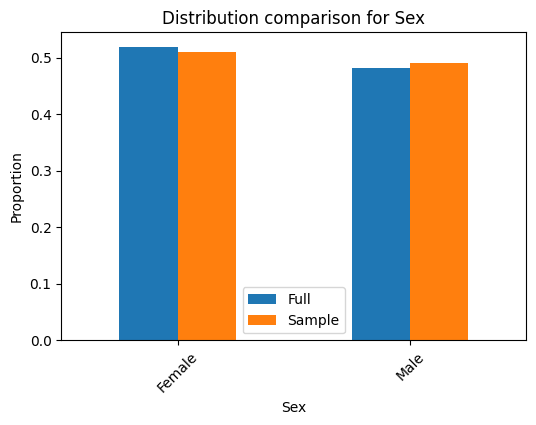

<Figure size 600x400 with 0 Axes>

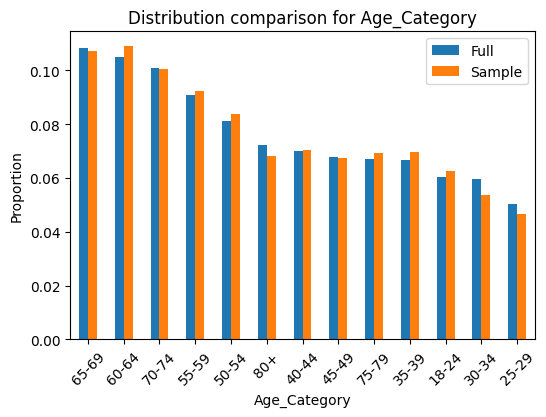

<Figure size 600x400 with 0 Axes>

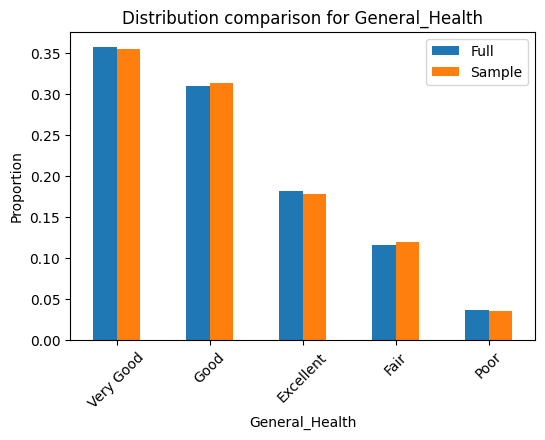

<Figure size 600x400 with 0 Axes>

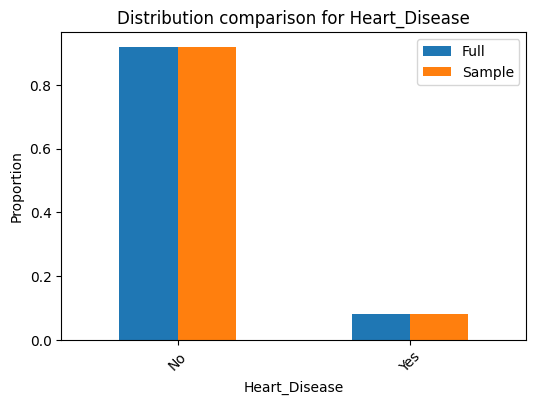

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Sex', 'Age_Category', 'General_Health', 'Heart_Disease']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    
    full_dist = df[col].value_counts(normalize=True).rename('Full')
    sample_dist = df_sample[col].value_counts(normalize=True).rename('Sample')
    compare = pd.concat([full_dist, sample_dist], axis=1)
    compare.plot(kind='bar', figsize=(6,4))
    
    plt.title(f"Distribution comparison for {col}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.show()

In [15]:
df_sample.to_csv("cvd_sample_10k.csv", index=False)